# Part II - Relationship between trip duration and member age
## by Inioluwa Mofiyinfoluwa Olaniran

## Investigation Overview


> In this investigation/presentation, we are going to look at how the trip duration and member age relate and affect each other.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It has 183412 observations (rows) with 16 features (columns). The dataset has datatypes int64(2), float64(7) and object (7). After cleaning techniques were carried on the dataset, there were 173768 observations (rows) and 13 features (columns) with datatypes category(3), datetime64(2), int64(3) and object(5).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

base_color = '#063175'

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the cleaned dataset for exploration into a pandas dataframe
bikes = pd.read_csv('fordgo_bikedata_work.csv')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173768 entries, 0 to 173767
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               173768 non-null  int64  
 1   duration_sec             173768 non-null  int64  
 2   start_time               173768 non-null  object 
 3   end_time                 173768 non-null  object 
 4   start_station_id         173573 non-null  float64
 5   start_station_name       173573 non-null  object 
 6   end_station_id           173573 non-null  float64
 7   end_station_name         173573 non-null  object 
 8   bike_id                  173768 non-null  int64  
 9   user_type                173768 non-null  object 
 10  member_birth_year        173768 non-null  int64  
 11  member_gender            173768 non-null  object 
 12  bike_share_for_all_trip  173768 non-null  bool   
 13  member_age               173768 non-null  int64  
dtypes: b

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Trip Duration Distribution Plot. A regular histogram was plotted but a long tail was shown in the results so the plot was transfered to a log scale type of plot to understand the data better. 


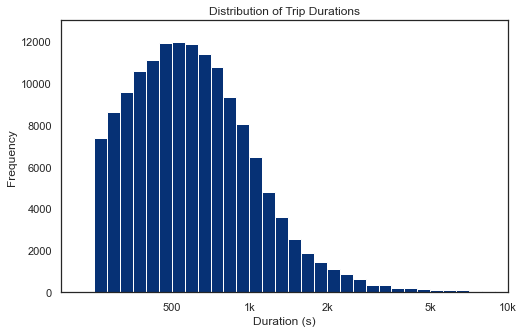

In [4]:
#plotting our distribution on a log scale
logbinsizes = 0.05
bins_ = 10 ** np.arange(2.4, np.log10(bikes['duration_sec'].max()) + logbinsizes, logbinsizes)

plt.figure(figsize=[8, 5])
sb.set_theme(style='white', palette='colorblind')
plt.hist(data = bikes, x = 'duration_sec', bins = bins_, color=base_color)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 13000])
plt.show();

> From the plot above, it was shown that the trip duration 500 and 1000 seconds are higher in their frequency. Which means that most people's trip duration is between 500 and 1000 seconds. It also shows that as the time increases from 1000 seconds, the trip duration according to the frequency reduces.

## (Visualization 2)

> Member_age Distribution Plot. Users from an age between ages 30-35 bike the most as they have a higher frequency on the distribution plot.

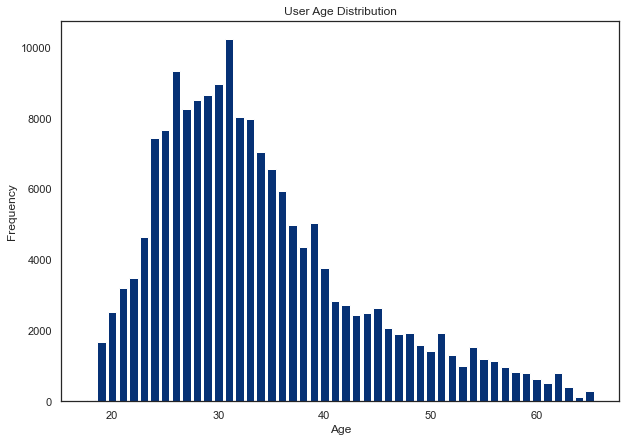

In [5]:
#plotting user age from the meber_age column on the bar chart
plt.figure(figsize=[10,7])
sb.set_theme(style='white', palette='colorblind')
plt.bar(x = bikes.member_age.value_counts().keys(), height = bikes.member_age.value_counts(), color=base_color )
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## (Visualization 3)

> The plot shows that the duration is more concentrated from age 20 to 50. Also, as the age increases, the trip duration decreases.


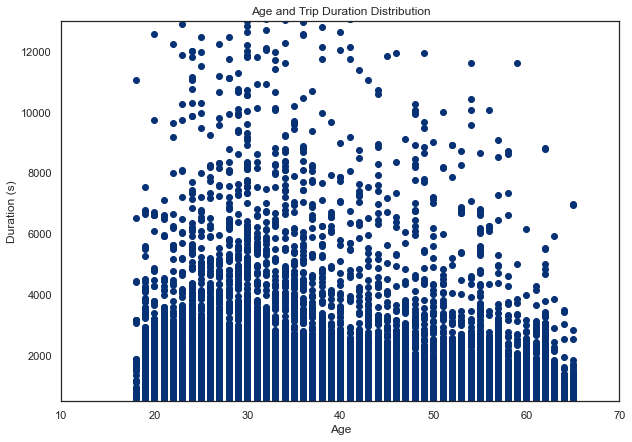

In [6]:
#plotting the distribution of the relationship between the users' age and the trip duration
plt.figure(figsize=[10,7])

sb.set_theme(style='white', palette='colorblind')
plt.scatter((bikes['member_age']), bikes['duration_sec'], alpha = 1, marker = 'o', color=base_color)
plt.axis([10, 70, 500, 13000])
plt.title('Age and Trip Duration Distribution')
plt.xlabel('Age')
plt.ylabel('Duration (s)')
plt.show();

## (Visualization 4)

> The plot proves that there are users that are subscribers than there are customers. But the plot is not completely understandable, we will separate the plot into two different plots for the two categories of user type.


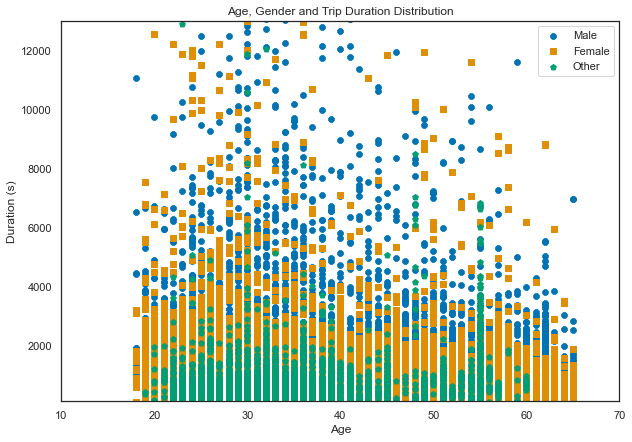

In [7]:
#plotting the relationship duration of the user age, gender and trip duration.
usergender_mark = [['Male', '8'],['Female', 's'],['Other', 'p']]
plt.figure(figsize=[10,7])
for genders1, marker in usergender_mark:
    bikes_gender = bikes[bikes['member_gender'] == genders1]
    plt.scatter((bikes_gender['member_age']), bikes_gender['duration_sec'], marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])

plt.axis([10, 70, 100, 13000 ])
plt.title('Age, Gender and Trip Duration Distribution')
plt.xlabel('Age')
plt.ylabel('Duration (s)')
plt.show();

## (Visualization 5)

> The three plots shows that males are more active as their plot is more concentrated than the other two meaning males have more trip durations than the other genders and the duration decreases as they get older.


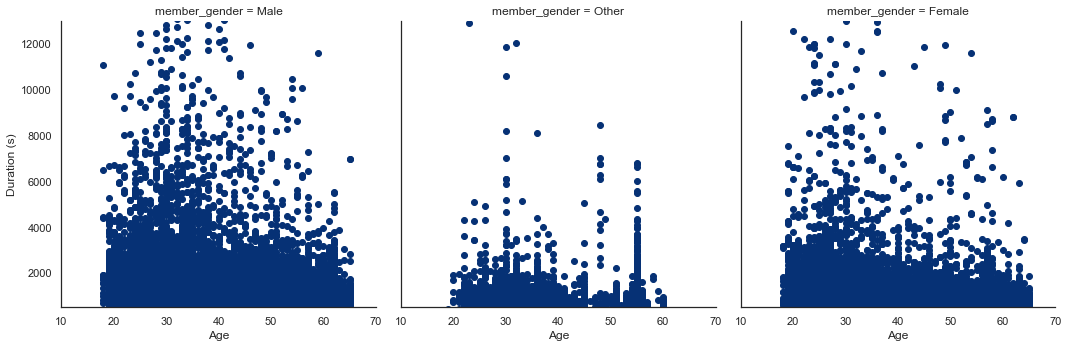

In [8]:
sb.set_theme(style='white', palette='colorblind')
gender = sb.FacetGrid(data = bikes, col = 'member_gender', col_wrap = 3, height = 5,
                 xlim = [10, 70], ylim = [500, 13000])
gender.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1, color = base_color)
gender.set_xlabels('Age')
gender.set_ylabels('Duration (s)')
plt.show()

## Summary of Findings

> All the plots helped to find that as a user ages (no matter type or gender), the trip duration reduces significantly. The ages where the trip duration is the strongest is between ages twenty (20) to fifty (50).


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slide_deck_template>.ipynb --to slides --post serve --no-input --no-prompt

In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
